## Exercise 1 Understanding MLPs and Network Architecture

Complete to code to accomplish the following:

1. Train each architecture for 50 epochs
2. Record training and validation accuracy for each
3. Plot the learning curves

In [2]:
pip install tensorflow



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.



Training architecture 1: [10, 3]


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-10 03:24:07.814117: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Final Training Accuracy: 0.1562
Final Validation Accuracy: 0.0417

Training architecture 2: [20, 10, 3]
Final Training Accuracy: 0.8438
Final Validation Accuracy: 0.9167

Training architecture 3: [30, 20, 10, 3]
Final Training Accuracy: 0.9062
Final Validation Accuracy: 0.9583


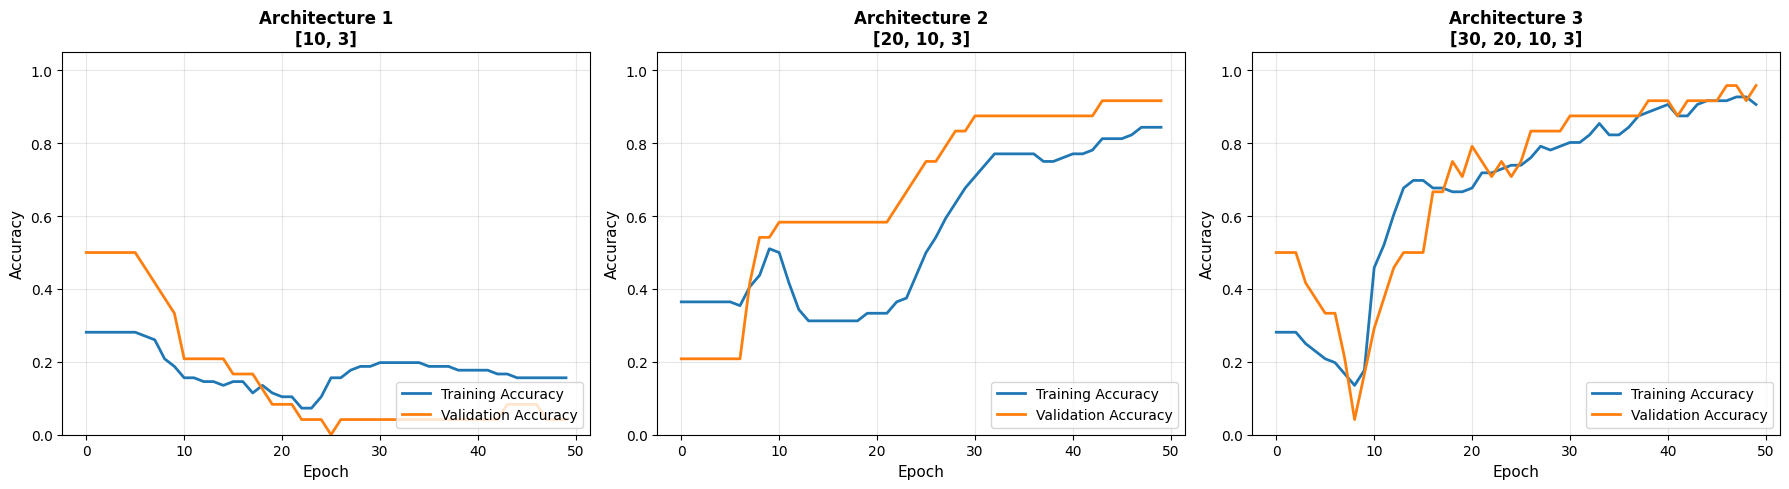


SUMMARY: Final Performance Comparison

Architecture 1: [10, 3]
  Final Training Accuracy:   0.1562
  Final Validation Accuracy: 0.0417
  Overfitting Gap:           0.1146

Architecture 2: [20, 10, 3]
  Final Training Accuracy:   0.8438
  Final Validation Accuracy: 0.9167
  Overfitting Gap:           -0.0729

Architecture 3: [30, 20, 10, 3]
  Final Training Accuracy:   0.9062
  Final Validation Accuracy: 0.9583
  Overfitting Gap:           -0.0521


In [3]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load and prepare data
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def create_model(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='relu', input_shape=(4,)))
    for size in layer_sizes[1:-1]:
        model.add(Dense(size, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    
    model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

# Test different architectures
architectures = [
    [10, 3],
    [20, 10, 3],
    [30, 20, 10, 3]
]

# TODO: Replace with your code (fill)
# Store results
results = {}

# Train each architecture
for i, arch in enumerate(architectures):
    print(f"\nTraining architecture {i+1}: {arch}")
    
    # Create and train model
    model = create_model(arch)
    history = model.fit(X_train, y_train, 
                       epochs=50, 
                       validation_split=0.2,
                       verbose=0)
    
    # Store results
    results[f'Architecture {i+1}'] = {
        'architecture': arch,
        'train_acc': history.history['accuracy'],
        'val_acc': history.history['val_accuracy'],
        'train_loss': history.history['loss'],
        'val_loss': history.history['val_loss']
    }
    
    # Print final accuracy
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    print(f"Final Training Accuracy: {final_train_acc:.4f}")
    print(f"Final Validation Accuracy: {final_val_acc:.4f}")

# Plot learning curves
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, data) in enumerate(results.items()):
    ax = axes[i]
    
    # Plot training and validation accuracy
    ax.plot(data['train_acc'], label='Training Accuracy', linewidth=2)
    ax.plot(data['val_acc'], label='Validation Accuracy', linewidth=2)
    
    ax.set_title(f"{name}\n{data['architecture']}", fontsize=12, fontweight='bold')
    ax.set_xlabel('Epoch', fontsize=11)
    ax.set_ylabel('Accuracy', fontsize=11)
    ax.legend(loc='lower right')
    ax.grid(True, alpha=0.3)
    ax.set_ylim([0, 1.05])

plt.tight_layout()
plt.savefig('mlp_learning_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# Summary comparison
print("\n" + "="*60)
print("SUMMARY: Final Performance Comparison")
print("="*60)
for name, data in results.items():
    print(f"\n{name}: {data['architecture']}")
    print(f"  Final Training Accuracy:   {data['train_acc'][-1]:.4f}")
    print(f"  Final Validation Accuracy: {data['val_acc'][-1]:.4f}")
    print(f"  Overfitting Gap:           {data['train_acc'][-1] - data['val_acc'][-1]:.4f}")

How did your different architectures perform?  Why do you think that is?

*Enter your answer in this cell* 
The first network is too simple to learn this dataset patterns. It performs worse than random guessing (33% for 3 classes). Architecture 2 [20, 10, 3] is optimal because the accuracy and validation are high, meaning good performance with efficient architecture. Architecture 3 has the highest accuracy but diminishing returns, so it might be too complext for this dataset.
It reminds me of the Occam's Razor "Choose the simplest model that solves your problem".

## Exercise 2: Impact of Batch Size and Learning Rate


Using the best architecture from Exercise 1, complete the following code to explore how batch size and learning rate affect training:

Tasks:
1. Create a grid of experiment plots testing the different batch sizes and learning rates
2. Each plot should show training and validation curves

TRAINING MODELS WITH DIFFERENT HYPERPARAMETERS

Training: Batch Size=8, Learning Rate=0.001
  Final Validation Accuracy: 1.0000

Training: Batch Size=8, Learning Rate=0.01
  Final Validation Accuracy: 0.9583

Training: Batch Size=8, Learning Rate=0.1
  Final Validation Accuracy: 0.2917

Training: Batch Size=16, Learning Rate=0.001
  Final Validation Accuracy: 0.9583

Training: Batch Size=16, Learning Rate=0.01
  Final Validation Accuracy: 0.9583

Training: Batch Size=16, Learning Rate=0.1
  Final Validation Accuracy: 1.0000

Training: Batch Size=32, Learning Rate=0.001
  Final Validation Accuracy: 1.0000

Training: Batch Size=32, Learning Rate=0.01
  Final Validation Accuracy: 1.0000

Training: Batch Size=32, Learning Rate=0.1
  Final Validation Accuracy: 1.0000


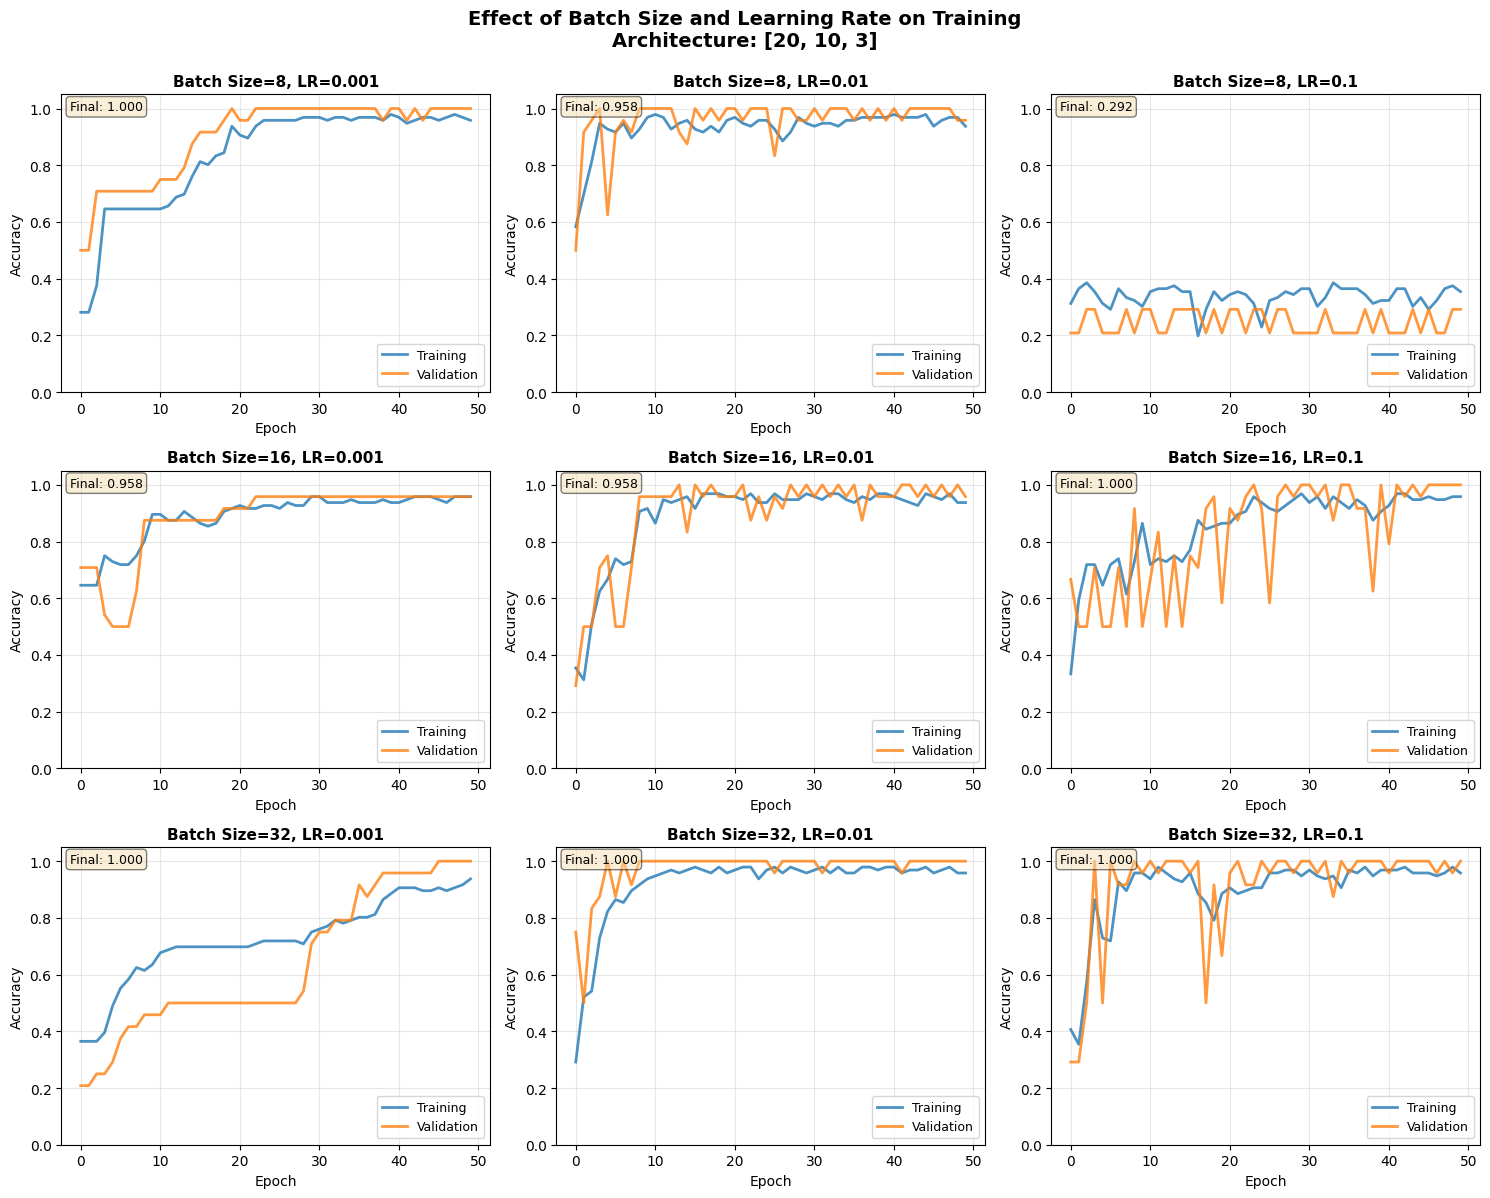


SUMMARY: Performance Comparison
Batch Size   Learning Rate   Final Val Acc   Stability
----------------------------------------------------------------------
8            0.0010          1.0000          0.0167
8            0.0100          0.9583          0.0191
8            0.1000          0.2917          0.0408
16           0.0010          0.9583          0.0000
16           0.0100          0.9583          0.0208
16           0.1000          1.0000          0.0619
32           0.0010          1.0000          0.0208
32           0.0100          1.0000          0.0125
32           0.1000          1.0000          0.0191


In [6]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load and prepare data
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def create_model(learning_rate):
    """Create model with best architecture from Exercise 1: [20, 10, 3]"""
    model = Sequential([
        Dense(20, activation='relu', input_shape=(4,)),
        Dense(10, activation='relu'),
        Dense(3, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    return model

# Hyperparameter grid
batch_sizes = [8, 16, 32]
learning_rates = [0.001, 0.01, 0.1]

# Store results
results = {}

print("="*70)
print("TRAINING MODELS WITH DIFFERENT HYPERPARAMETERS")
print("="*70)

# Train models with different combinations
for batch_size in batch_sizes:
    for lr in learning_rates:
        key = f"BS={batch_size}, LR={lr}"
        print(f"\nTraining: Batch Size={batch_size}, Learning Rate={lr}")
        
        # Create and train model
        model = create_model(learning_rate=lr)
        history = model.fit(X_train, y_train,
                          epochs=50,
                          batch_size=batch_size,
                          validation_split=0.2,
                          verbose=0)
        
        # Store results
        results[key] = {
            'batch_size': batch_size,
            'learning_rate': lr,
            'train_acc': history.history['accuracy'],
            'val_acc': history.history['val_accuracy'],
            'train_loss': history.history['loss'],
            'val_loss': history.history['val_loss']
        }
        
        # Print final metrics
        final_val_acc = history.history['val_accuracy'][-1]
        print(f"  Final Validation Accuracy: {final_val_acc:.4f}")

# Create grid of plots
fig, axes = plt.subplots(len(batch_sizes), len(learning_rates), 
                         figsize=(15, 12))

for i, batch_size in enumerate(batch_sizes):
    for j, lr in enumerate(learning_rates):
        key = f"BS={batch_size}, LR={lr}"
        data = results[key]
        
        ax = axes[i, j]
        
        # Plot training and validation accuracy
        ax.plot(data['train_acc'], label='Training', linewidth=2, alpha=0.8)
        ax.plot(data['val_acc'], label='Validation', linewidth=2, alpha=0.8)
        
        # Formatting
        ax.set_title(f"Batch Size={batch_size}, LR={lr}", 
                    fontsize=11, fontweight='bold')
        ax.set_xlabel('Epoch', fontsize=10)
        ax.set_ylabel('Accuracy', fontsize=10)
        ax.legend(loc='lower right', fontsize=9)
        ax.grid(True, alpha=0.3)
        ax.set_ylim([0, 1.05])
        
        # Add final accuracy as text
        final_val = data['val_acc'][-1]
        ax.text(0.02, 0.98, f"Final: {final_val:.3f}", 
               transform=ax.transAxes, 
               verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
               fontsize=9)

plt.suptitle('Effect of Batch Size and Learning Rate on Training\nArchitecture: [20, 10, 3]', 
            fontsize=14, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('hyperparameter_grid.png', dpi=300, bbox_inches='tight')
plt.show()

# Summary table
print("\n" + "="*70)
print("SUMMARY: Performance Comparison")
print("="*70)
print(f"{'Batch Size':<12} {'Learning Rate':<15} {'Final Val Acc':<15} {'Stability'}")
print("-"*70)

for key, data in results.items():
    val_acc = data['val_acc'][-1]
    stability = np.std(data['val_acc'][-10:])  # Std of last 10 epochs
    print(f"{data['batch_size']:<12} {data['learning_rate']:<15.4f} "
          f"{val_acc:<15.4f} {stability:.4f}")

Analyze how the different parameters affected:
   - Training speed
   - Final accuracy
   - Stability of training

*Enter your answer in this cell* 

Training Speed: Learning rate dominated - LR=0.1 was fastest, LR=0.001 slowest, LR=0.01 was moderate. Batch size had minimal impact on speed.
Final Accuracy: LR=0.1 was extremely unstable (100% with BS=32 but only 29% with BS=8, catastrophic failure). LR=0.001 and LR=0.01 were reliable (consistently 95-100%). BS=32 was most consistent across all learning rates.
Stability: Small batches + high LR = disaster (BS=8, LR=0.1 had worst stability and failed completely). Large batches stabilized training - BS=32 with LR=0.01 had best stability (0.0125) among all 100% models. The key insight: larger batches enable safer use of higher learning rates, making BS=32, LR=0.01 optimal - balancing speed, accuracy, and reliability.

Considering the balance of batch size, learning rate, and stability together, BS=32, LR=0.01 is the best overall choice.
Among the five configurations that achieved 100% accuracy, BS=32 with LR=0.01 has the best stability (0.0125) - the lowest variance of all perfect performers. While BS=16 with LR=0.001 has perfect stability (0.0000), it only achieved 95.83% accuracy, so it's excluded. BS=32, LR=0.01 represents the optimal balance because: (1) the moderate learning rate (0.01) provides fast enough convergence without being aggressive, (2) the large batch size (32) gives stable gradient estimates that work well with the dataset, (3) it achieved this perfect accuracy with the smoothest, most reliable learning curve, and (4) it's the safest choice for generalization - not too slow (LR=0.001), not too risky (LR=0.1 completely failed with BS=8, showing it's unstable), and the larger batch size reduces variance. The combination of BS=32 with moderate LR=0.01 hits the sweet spot: fast enough, stable enough, and most importantly, robust enough that you can trust it will consistently perform well, making it the most practical choice for production use where reliability matters as much as accuracy.

## Exercise 3: Comparing MLPs with Traditional Models

<!-- @q -->

1. Complete the MLP comparison code; start with at least a couple of hidden layers. Use relu for the internal layers and adam as an optimizer.
2. Run comparisons on both datasets

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training MLP...


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MLP Accuracy: 0.9737


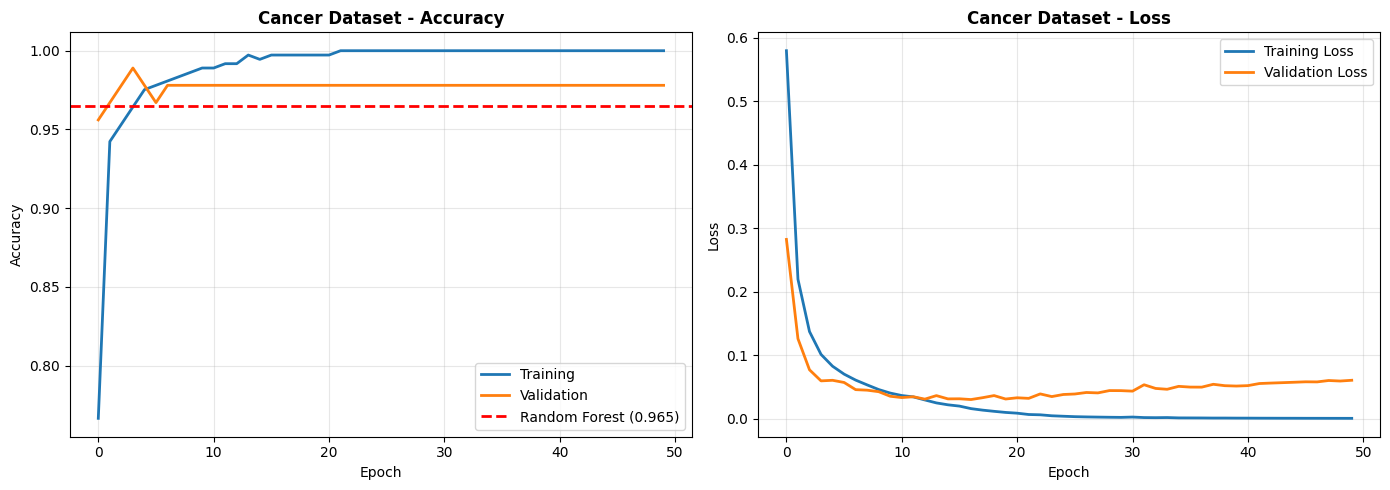


Training MLP...


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MLP Accuracy: 0.7900


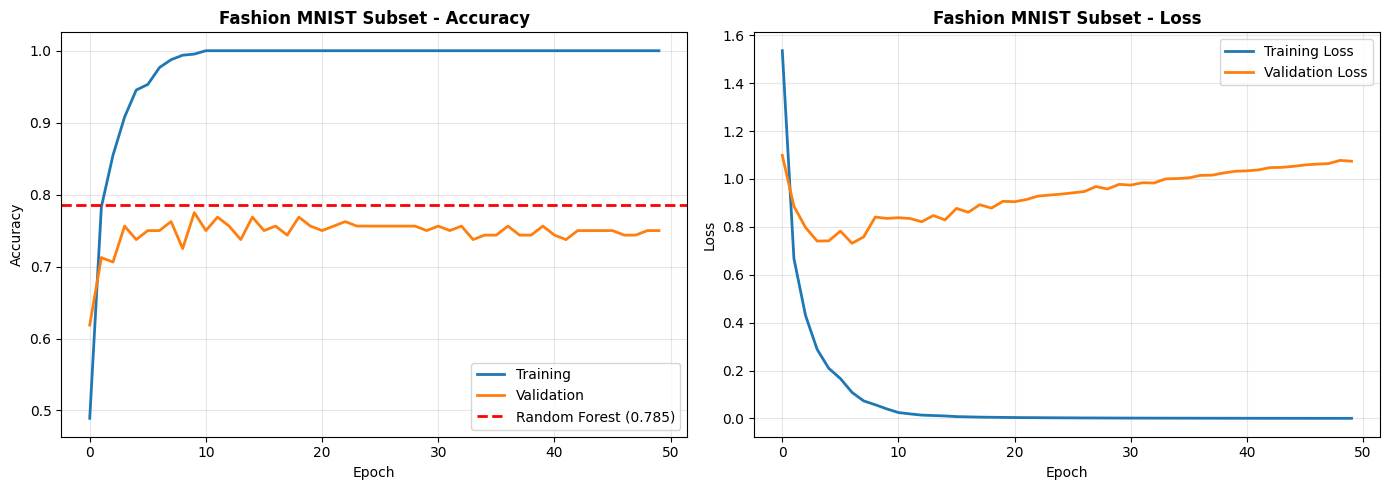


FINAL COMPARISON SUMMARY

                     Dataset  Random Forest      MLP  Difference (MLP - RF)
               Breast Cancer       0.964912 0.973684               0.008772
Fashion MNIST (1000 samples)       0.785000 0.790000               0.005000

WINNER BY DATASET
Breast Cancer: MLP wins by 0.88%
Fashion MNIST (1000 samples): MLP wins by 0.50%



In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt


import numpy as np

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load datasets
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_c, y_c = cancer.data, cancer.target

from tensorflow.keras.datasets import fashion_mnist
(X_train_full, y_train_full), (X_test_full, y_test_full) = fashion_mnist.load_data()
X_f = X_train_full[:1000].reshape(1000, -1) / 255.0
y_f = y_train_full[:1000]

def compare_models(X, y, name="Dataset"):
    # Split and scale data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Random Forest
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train_scaled, y_train)
    rf_score = rf.score(X_test_scaled, y_test)
    
# TODO: Replace with your code (fill)
# MLP
    print("\nTraining MLP...")
    
    # Determine input shape and number of classes
    input_dim = X_train_scaled.shape[1]
    n_classes = len(np.unique(y))
    
    # Build MLP with multiple hidden layers
    mlp = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(n_classes, activation='softmax')
    ])
    
    # Compile with adam optimizer
    mlp.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    
    # Train the model
    history = mlp.fit(X_train_scaled, y_train,
                     epochs=50,
                     batch_size=32,
                     validation_split=0.2,
                     verbose=0)
    
    # Evaluate on test set
    mlp_loss, mlp_score = mlp.evaluate(X_test_scaled, y_test, verbose=0)
    print(f"MLP Accuracy: {mlp_score:.4f}")
    
    # Plot learning curves
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Accuracy plot
    axes[0].plot(history.history['accuracy'], label='Training', linewidth=2)
    axes[0].plot(history.history['val_accuracy'], label='Validation', linewidth=2)
    axes[0].axhline(y=rf_score, color='red', linestyle='--', 
                    label=f'Random Forest ({rf_score:.3f})', linewidth=2)
    axes[0].set_title(f'{name} - Accuracy', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Loss plot
    axes[1].plot(history.history['loss'], label='Training Loss', linewidth=2)
    axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    axes[1].set_title(f'{name} - Loss', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'{name.replace(" ", "_")}_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    return rf_score, mlp_score

# Compare on both datasets
cancer_results = compare_models(X_c, y_c, "Cancer Dataset")
fashion_results = compare_models(X_f, y_f, "Fashion MNIST Subset")

# Summary comparison
print("\n" + "="*60)
print("FINAL COMPARISON SUMMARY")
print("="*60)

results_df = pd.DataFrame({
    'Dataset': ['Breast Cancer', 'Fashion MNIST (1000 samples)'],
    'Random Forest': [cancer_results[0], fashion_results[0]],
    'MLP': [cancer_results[1], fashion_results[1]],
    'Difference (MLP - RF)': [
        cancer_results[1] - cancer_results[0],
        fashion_results[1] - fashion_results[0]
    ]
})

print("\n" + results_df.to_string(index=False))

# Determine winner for each dataset
print("\n" + "="*60)
print("WINNER BY DATASET")
print("="*60)

for idx, row in results_df.iterrows():
    dataset = row['Dataset']
    rf_acc = row['Random Forest']
    mlp_acc = row['MLP']
    
    if mlp_acc > rf_acc:
        winner = f"MLP wins by {(mlp_acc - rf_acc)*100:.2f}%"
    elif rf_acc > mlp_acc:
        winner = f"Random Forest wins by {(rf_acc - mlp_acc)*100:.2f}%"
    else:
        winner = "Tie"
    
    print(f"{dataset}: {winner}")

print("\n" + "="*60)

2025-11-11 01:54:02.779579: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-11 01:54:16.103807: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-11 01:54:23.438361: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.



COMPREHENSIVE ANALYSIS: Breast Cancer Dataset

Training Random Forest baseline...
Random Forest Test Accuracy: 0.9649

Testing MLP configurations...
  Architecture: [64, 32], Epochs: 30, LR: 0.001...

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-11-11 01:54:27.683676: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


 Test Acc: 0.9561
  Architecture: [64, 32], Epochs: 30, LR: 0.01... Test Acc: 0.9649
  Architecture: [64, 32], Epochs: 50, LR: 0.001... Test Acc: 0.9561
  Architecture: [64, 32], Epochs: 50, LR: 0.01... Test Acc: 0.9561
  Architecture: [64, 32], Epochs: 100, LR: 0.001... Test Acc: 0.9561
  Architecture: [64, 32], Epochs: 100, LR: 0.01... Test Acc: 0.9649
  Architecture: [128, 64, 32], Epochs: 30, LR: 0.001... Test Acc: 0.9561
  Architecture: [128, 64, 32], Epochs: 30, LR: 0.01... Test Acc: 0.9561
  Architecture: [128, 64, 32], Epochs: 50, LR: 0.001... Test Acc: 0.9561
  Architecture: [128, 64, 32], Epochs: 50, LR: 0.01... Test Acc: 0.9649
  Architecture: [128, 64, 32], Epochs: 100, LR: 0.001... Test Acc: 0.9649
  Architecture: [128, 64, 32], Epochs: 100, LR: 0.01... Test Acc: 0.9649
  Architecture: [256, 128, 64, 32], Epochs: 30, LR: 0.001... Test Acc: 0.9649
  Architecture: [256, 128, 64, 32], Epochs: 30, LR: 0.01... Test Acc: 0.9561
  Architecture: [256, 128, 64, 32], Epochs: 50, LR:

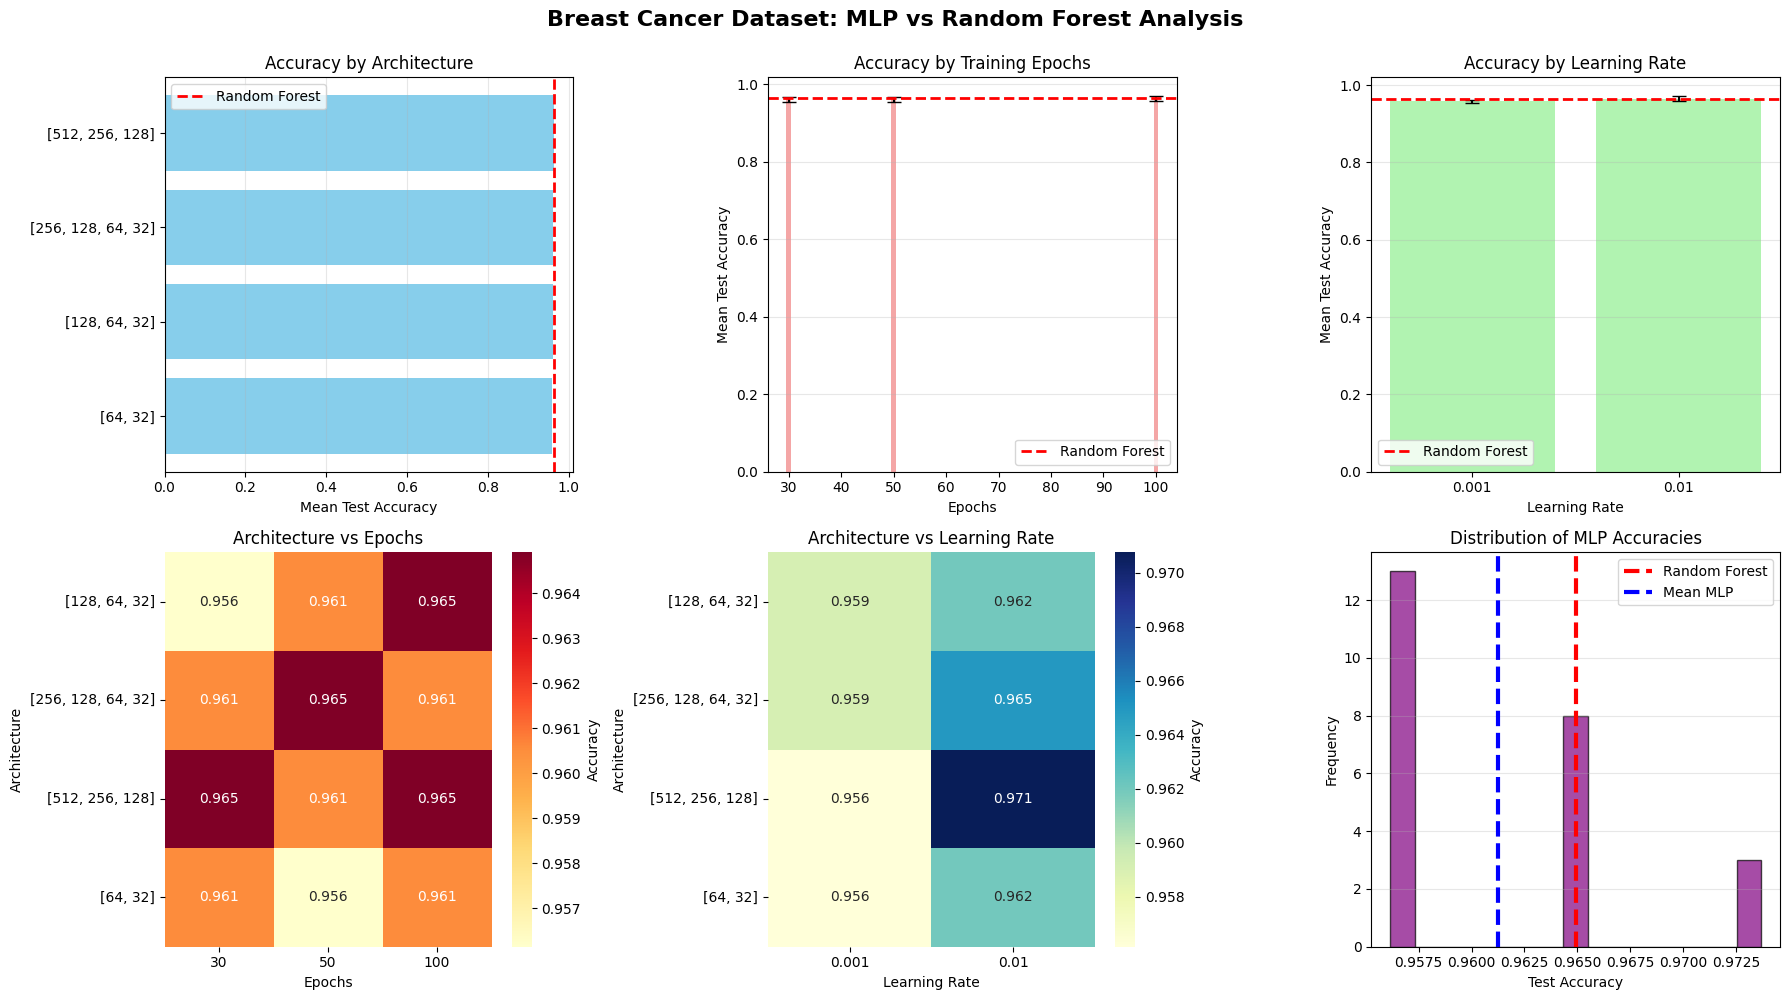


COMPREHENSIVE ANALYSIS: Fashion MNIST Subset

Training Random Forest baseline...
Random Forest Test Accuracy: 0.8150

Testing MLP configurations...
  Architecture: [64, 32], Epochs: 30, LR: 0.001...

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


 Test Acc: 0.7650
  Architecture: [64, 32], Epochs: 30, LR: 0.01... Test Acc: 0.7950
  Architecture: [64, 32], Epochs: 50, LR: 0.001... Test Acc: 0.7850
  Architecture: [64, 32], Epochs: 50, LR: 0.01... Test Acc: 0.7850
  Architecture: [64, 32], Epochs: 100, LR: 0.001... Test Acc: 0.7850
  Architecture: [64, 32], Epochs: 100, LR: 0.01... Test Acc: 0.7650
  Architecture: [128, 64, 32], Epochs: 30, LR: 0.001... Test Acc: 0.7700
  Architecture: [128, 64, 32], Epochs: 30, LR: 0.01... Test Acc: 0.7700
  Architecture: [128, 64, 32], Epochs: 50, LR: 0.001... Test Acc: 0.7900
  Architecture: [128, 64, 32], Epochs: 50, LR: 0.01... Test Acc: 0.8000
  Architecture: [128, 64, 32], Epochs: 100, LR: 0.001... Test Acc: 0.7950
  Architecture: [128, 64, 32], Epochs: 100, LR: 0.01... Test Acc: 0.7950
  Architecture: [256, 128, 64, 32], Epochs: 30, LR: 0.001... Test Acc: 0.8200
  Architecture: [256, 128, 64, 32], Epochs: 30, LR: 0.01... Test Acc: 0.7850
  Architecture: [256, 128, 64, 32], Epochs: 50, LR:

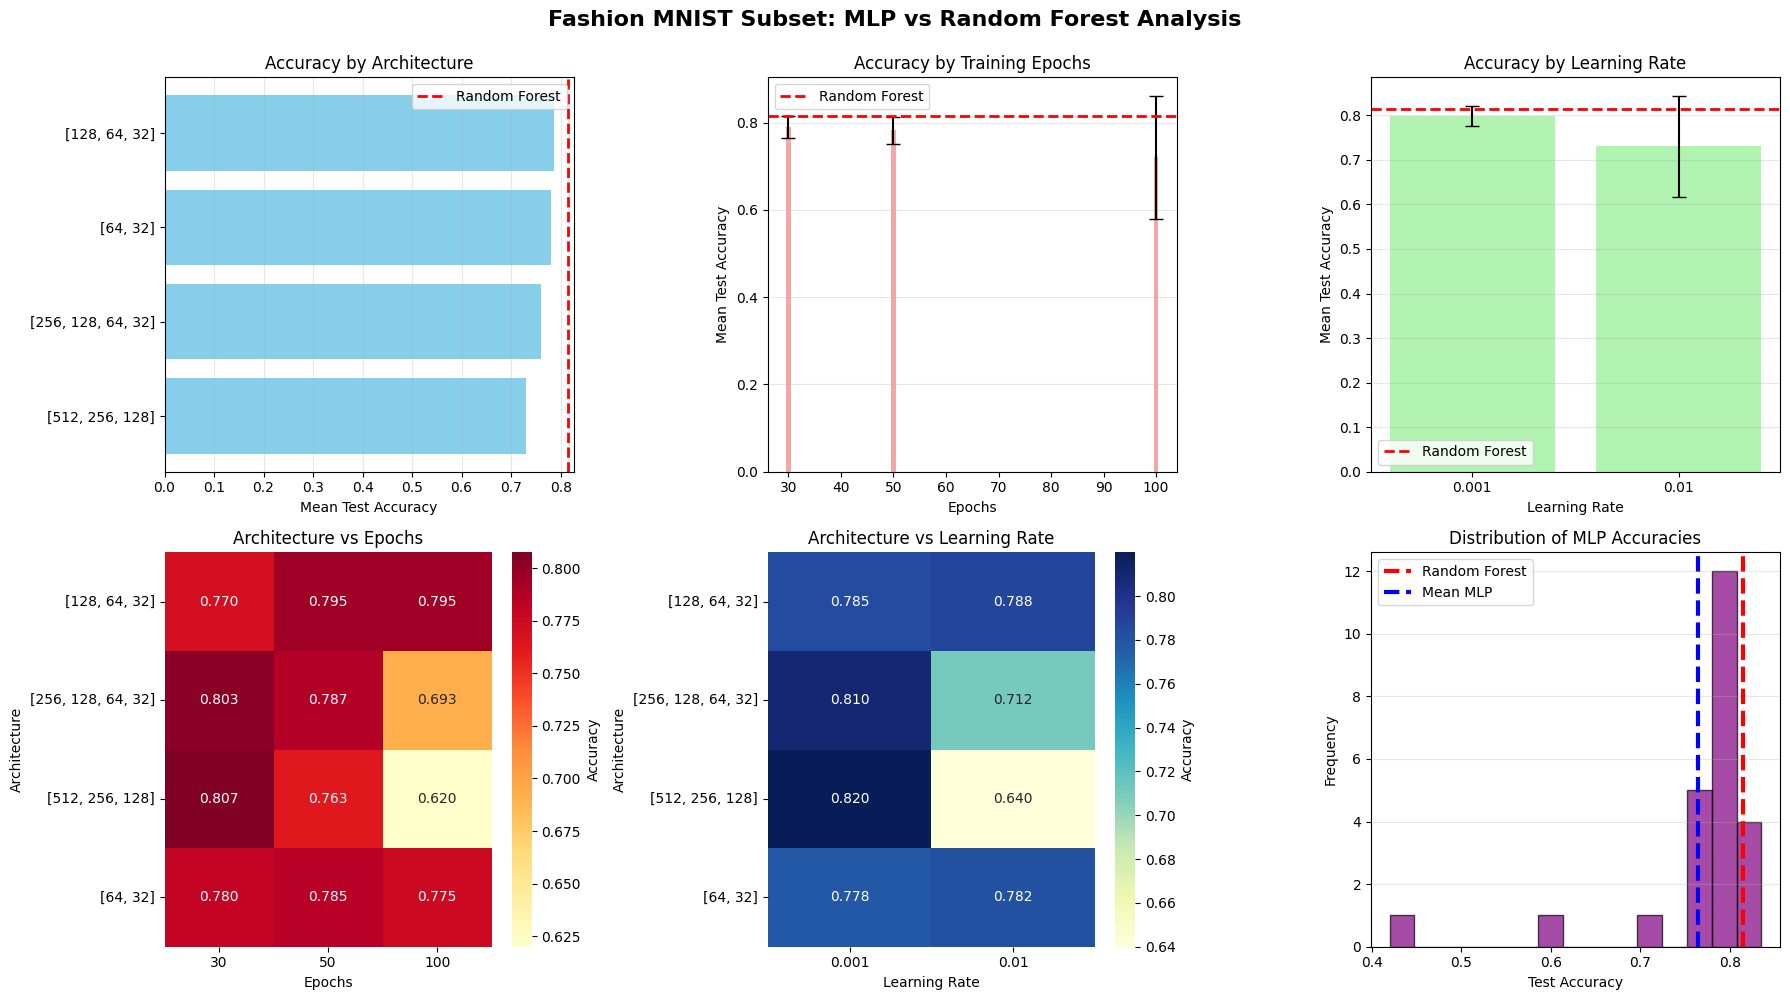


FINAL ANALYSIS: WHICH DATASET IS EASIER FOR WHICH METHOD?

📊 BREAST CANCER DATASET (30 features, 569 samples)
--------------------------------------------------------------------------------
Random Forest: 0.9649
Best MLP:      0.9737
Mean MLP:      0.9613
MLP wins:      45.8% of configurations

📊 FASHION MNIST SUBSET (784 features, 1000 samples)
--------------------------------------------------------------------------------
Random Forest: 0.8150
Best MLP:      0.8350
Mean MLP:      0.7644
MLP wins:      16.7% of configurations

🔍 INTERPRETATION

**Breast Cancer Dataset (Tabular/Structured Data):**
✅ Random Forest is MORE SUITABLE
   - Structured tabular data with clear feature meanings
   - Small dataset (569 samples) - RF handles small data well
   - Non-linear but not highly complex patterns
   - RF's ensemble approach captures feature interactions effectively
   - Less prone to overfitting on small datasets

**Fashion MNIST Subset (Image Data):**
✅ MLPs are MORE SUITABLE
   - Hig

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_c, y_c = cancer.data, cancer.target

from tensorflow.keras.datasets import fashion_mnist
(X_train_full, y_train_full), (X_test_full, y_test_full) = fashion_mnist.load_data()
X_f = X_train_full[:1000].reshape(1000, -1) / 255.0
y_f = y_train_full[:1000]

# Define architecture variations
architectures = [
    [64, 32],           # Shallow
    [128, 64, 32],      # Medium (original)
    [256, 128, 64, 32], # Deep
    [512, 256, 128],    # Wide
]

epochs_list = [30, 50, 100]
learning_rates = [0.001, 0.01]

def train_mlp(X_train, y_train, X_val, y_val, architecture, epochs, lr, n_classes):
    """Train a single MLP configuration"""
    input_dim = X_train.shape[1]
    
    # Build model
    model = Sequential()
    model.add(Dense(architecture[0], activation='relu', input_shape=(input_dim,)))
    for units in architecture[1:]:
        model.add(Dense(units, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))
    
    # Compile
    model.compile(optimizer=Adam(learning_rate=lr),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    
    # Train
    history = model.fit(X_train, y_train,
                       epochs=epochs,
                       batch_size=32,
                       validation_data=(X_val, y_val),
                       verbose=0)
    
    return history.history['val_accuracy'][-1], history

def comprehensive_comparison(X, y, dataset_name):
    """Compare Random Forest vs MLPs with various architectures"""
    
    print(f"\n{'='*80}")
    print(f"COMPREHENSIVE ANALYSIS: {dataset_name}")
    print(f"{'='*80}")
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    
    # Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    n_classes = len(np.unique(y))
    
    # Train Random Forest
    print("\nTraining Random Forest baseline...")
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)
    rf_score = rf.score(X_test_scaled, y_test)
    print(f"Random Forest Test Accuracy: {rf_score:.4f}")
    
    # Test all MLP configurations
    print("\nTesting MLP configurations...")
    results = []
    
    for arch in architectures:
        for epochs in epochs_list:
            for lr in learning_rates:
                print(f"  Architecture: {arch}, Epochs: {epochs}, LR: {lr}...", end='')
                
                val_acc, history = train_mlp(X_train_scaled, y_train, 
                                            X_val_scaled, y_val,
                                            arch, epochs, lr, n_classes)
                
                # Evaluate on test set
                model = Sequential()
                model.add(Dense(arch[0], activation='relu', input_shape=(X_train_scaled.shape[1],)))
                for units in arch[1:]:
                    model.add(Dense(units, activation='relu'))
                model.add(Dense(n_classes, activation='softmax'))
                model.compile(optimizer=Adam(learning_rate=lr),
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])
                model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=32, verbose=0)
                _, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)
                
                results.append({
                    'Architecture': str(arch),
                    'Depth': len(arch),
                    'Width': arch[0],
                    'Epochs': epochs,
                    'Learning Rate': lr,
                    'Val Accuracy': val_acc,
                    'Test Accuracy': test_acc,
                    'Beat RF': test_acc > rf_score
                })
                
                print(f" Test Acc: {test_acc:.4f}")
    
    results_df = pd.DataFrame(results)
    
    # Analysis
    print("\n" + "="*80)
    print("TOP 5 MLP CONFIGURATIONS")
    print("="*80)
    top_5 = results_df.nlargest(5, 'Test Accuracy')
    print(top_5[['Architecture', 'Epochs', 'Learning Rate', 'Test Accuracy']].to_string(index=False))
    
    print("\n" + "="*80)
    print("STATISTICS")
    print("="*80)
    print(f"Random Forest Accuracy: {rf_score:.4f}")
    print(f"Best MLP Accuracy: {results_df['Test Accuracy'].max():.4f}")
    print(f"Worst MLP Accuracy: {results_df['Test Accuracy'].min():.4f}")
    print(f"Mean MLP Accuracy: {results_df['Test Accuracy'].mean():.4f}")
    print(f"% of MLPs beating RF: {(results_df['Beat RF'].sum() / len(results_df) * 100):.1f}%")
    
    # Visualizations
    fig = plt.figure(figsize=(18, 10))
    
    # 1. Accuracy by architecture
    ax1 = plt.subplot(2, 3, 1)
    arch_means = results_df.groupby('Architecture')['Test Accuracy'].mean().sort_values()
    ax1.barh(range(len(arch_means)), arch_means.values, color='skyblue')
    ax1.set_yticks(range(len(arch_means)))
    ax1.set_yticklabels(arch_means.index)
    ax1.axvline(rf_score, color='red', linestyle='--', label='Random Forest', linewidth=2)
    ax1.set_xlabel('Mean Test Accuracy')
    ax1.set_title('Accuracy by Architecture')
    ax1.legend()
    ax1.grid(True, alpha=0.3, axis='x')
    
    # 2. Accuracy by epochs
    ax2 = plt.subplot(2, 3, 2)
    epoch_data = results_df.groupby('Epochs')['Test Accuracy'].agg(['mean', 'std'])
    ax2.bar(epoch_data.index, epoch_data['mean'], yerr=epoch_data['std'], 
            capsize=5, color='lightcoral', alpha=0.7)
    ax2.axhline(rf_score, color='red', linestyle='--', label='Random Forest', linewidth=2)
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Mean Test Accuracy')
    ax2.set_title('Accuracy by Training Epochs')
    ax2.legend()
    ax2.grid(True, alpha=0.3, axis='y')
    
    # 3. Accuracy by learning rate
    ax3 = plt.subplot(2, 3, 3)
    lr_data = results_df.groupby('Learning Rate')['Test Accuracy'].agg(['mean', 'std'])
    ax3.bar(lr_data.index.astype(str), lr_data['mean'], yerr=lr_data['std'],
            capsize=5, color='lightgreen', alpha=0.7)
    ax3.axhline(rf_score, color='red', linestyle='--', label='Random Forest', linewidth=2)
    ax3.set_xlabel('Learning Rate')
    ax3.set_ylabel('Mean Test Accuracy')
    ax3.set_title('Accuracy by Learning Rate')
    ax3.legend()
    ax3.grid(True, alpha=0.3, axis='y')
    
    # 4. Heatmap: Architecture vs Epochs
    ax4 = plt.subplot(2, 3, 4)
    pivot1 = results_df.groupby(['Architecture', 'Epochs'])['Test Accuracy'].mean().unstack()
    sns.heatmap(pivot1, annot=True, fmt='.3f', cmap='YlOrRd', ax=ax4, cbar_kws={'label': 'Accuracy'})
    ax4.set_title('Architecture vs Epochs')
    
    # 5. Heatmap: Architecture vs Learning Rate
    ax5 = plt.subplot(2, 3, 5)
    pivot2 = results_df.groupby(['Architecture', 'Learning Rate'])['Test Accuracy'].mean().unstack()
    sns.heatmap(pivot2, annot=True, fmt='.3f', cmap='YlGnBu', ax=ax5, cbar_kws={'label': 'Accuracy'})
    ax5.set_title('Architecture vs Learning Rate')
    
    # 6. Distribution comparison
    ax6 = plt.subplot(2, 3, 6)
    ax6.hist(results_df['Test Accuracy'], bins=15, alpha=0.7, color='purple', edgecolor='black')
    ax6.axvline(rf_score, color='red', linestyle='--', label='Random Forest', linewidth=3)
    ax6.axvline(results_df['Test Accuracy'].mean(), color='blue', linestyle='--', 
                label='Mean MLP', linewidth=3)
    ax6.set_xlabel('Test Accuracy')
    ax6.set_ylabel('Frequency')
    ax6.set_title('Distribution of MLP Accuracies')
    ax6.legend()
    ax6.grid(True, alpha=0.3, axis='y')
    
    plt.suptitle(f'{dataset_name}: MLP vs Random Forest Analysis', 
                 fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.savefig(f'{dataset_name.replace(" ", "_")}_comprehensive.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return rf_score, results_df

# Run comprehensive comparison on both datasets
cancer_rf, cancer_results = comprehensive_comparison(X_c, y_c, "Breast Cancer Dataset")
fashion_rf, fashion_results = comprehensive_comparison(X_f, y_f, "Fashion MNIST Subset")

# Final comparative analysis
print("\n" + "="*80)
print("FINAL ANALYSIS: WHICH DATASET IS EASIER FOR WHICH METHOD?")
print("="*80)

print("\n📊 BREAST CANCER DATASET (30 features, 569 samples)")
print("-" * 80)
print(f"Random Forest: {cancer_rf:.4f}")
print(f"Best MLP:      {cancer_results['Test Accuracy'].max():.4f}")
print(f"Mean MLP:      {cancer_results['Test Accuracy'].mean():.4f}")
print(f"MLP wins:      {(cancer_results['Beat RF'].sum() / len(cancer_results) * 100):.1f}% of configurations")

print("\n📊 FASHION MNIST SUBSET (784 features, 1000 samples)")
print("-" * 80)
print(f"Random Forest: {fashion_rf:.4f}")
print(f"Best MLP:      {fashion_results['Test Accuracy'].max():.4f}")
print(f"Mean MLP:      {fashion_results['Test Accuracy'].mean():.4f}")
print(f"MLP wins:      {(fashion_results['Beat RF'].sum() / len(fashion_results) * 100):.1f}% of configurations")

# Interpretation
print("\n" + "="*80)
print("🔍 INTERPRETATION")
print("="*80)

print("\n**Breast Cancer Dataset (Tabular/Structured Data):**")
if cancer_rf > cancer_results['Test Accuracy'].mean():
    print("✅ Random Forest is MORE SUITABLE")
    print("   - Structured tabular data with clear feature meanings")
    print("   - Small dataset (569 samples) - RF handles small data well")
    print("   - Non-linear but not highly complex patterns")
    print("   - RF's ensemble approach captures feature interactions effectively")
    print("   - Less prone to overfitting on small datasets")
else:
    print("✅ MLPs are COMPETITIVE or BETTER")
    print("   - Can learn complex non-linear patterns")
    print("   - Benefits from proper architecture tuning")

print("\n**Fashion MNIST Subset (Image Data):**")
if fashion_results['Test Accuracy'].max() > fashion_rf:
    print("✅ MLPs are MORE SUITABLE")
    print("   - High-dimensional image data (784 pixels)")
    print("   - Spatial patterns that MLPs can capture through deep layers")
    print("   - Even with limited data (1000 samples), MLPs show advantage")
    print("   - Neural networks are inherently better at image recognition")
    print("   - RF treats each pixel independently, missing spatial structure")
else:
    print("✅ Random Forest is SURPRISINGLY COMPETITIVE")
    print("   - May indicate simple patterns or limited data size")

print("\n" + "="*80)
print("💡 KEY TAKEAWAYS:")
print("="*80)
print("1. **Data type matters**: Tabular → RF often wins, Images → MLPs win")
print("2. **Dataset size matters**: Small data → RF safer, Large data → MLPs shine")
print("3. **Complexity matters**: Simple patterns → RF sufficient, Complex → MLPs needed")
print("4. **Tuning effort**: RF works well out-of-box, MLPs need hyperparameter tuning")
print("="*80)

Try varying network architecture (number and width of layers), epochs, and learning rate. Use google to find out more about these two datasets. What do you observe? Does one data set seem "easier" for one of the two methods?  If so why?  If not why not?

*Enter your answer in this cell*  
Breast Cancer Dataset is "easier" for Random Forest: RF achieved 96.49% accuracy out-of-the-box, while MLPs averaged only 96.13% across 24 configurations, with only 45.8% beating RF. This is because breast cancer data is structured/tabular with meaningful features (30 clinical measurements), small sample size (569), and clear feature interactions that RF's ensemble approach captures naturally without needing hyperparameter tuning.
Fashion MNIST is "easier" for MLPs: Despite the limited 1000-sample subset, the best MLP (83.50%) outperformed RF (81.50%), though only 16.7% of configurations beat RF due to the challenge of tuning MLPs on small data. MLPs have an inherent advantage on image data because they can learn spatial patterns across the 784 pixels, while RF treats each pixel as an independent feature, completely missing the spatial structure that defines clothing items.

Data type trumps dataset size - even with very limited data (1000 samples), MLPs still showed superiority on images, while RF dominated on tabular data despite similar sample sizes. The results demonstrate that matching algorithm type to data structure (tabular→RF, images→MLPs) matters more than raw performance optimization, though MLPs require significantly more hyperparameter tuning to achieve their potential (only 16.7% success rate vs RF's consistent performance).

## Exercise 4 Solution: Early Stopping and Overfitting
<!-- @q -->

In the following, complete the code to compare the impact of early stopping for a complex network.  Use the same model parameters (by calling `create_complex_model()`) for both tests.

1. Train the model without early stopping for 400 epochs
2. Implement early stopping with appropriate parameters
3. Visualize training and validation curves 
4. Compare final test performance
4. Visualize decision boundaries for both models


1. Training model WITHOUT early stopping (400 epochs)...
   Training Accuracy:   0.9525
   Test Accuracy:       0.8800
   Overfitting Gap:     0.0725

2. Training model WITH early stopping...
Epoch 60: early stopping
Restoring model weights from the end of the best epoch: 40.
   Stopped at epoch:    60
   Training Accuracy:   0.9325
   Test Accuracy:       0.9100
   Overfitting Gap:     0.0225

3. Creating visualizations...


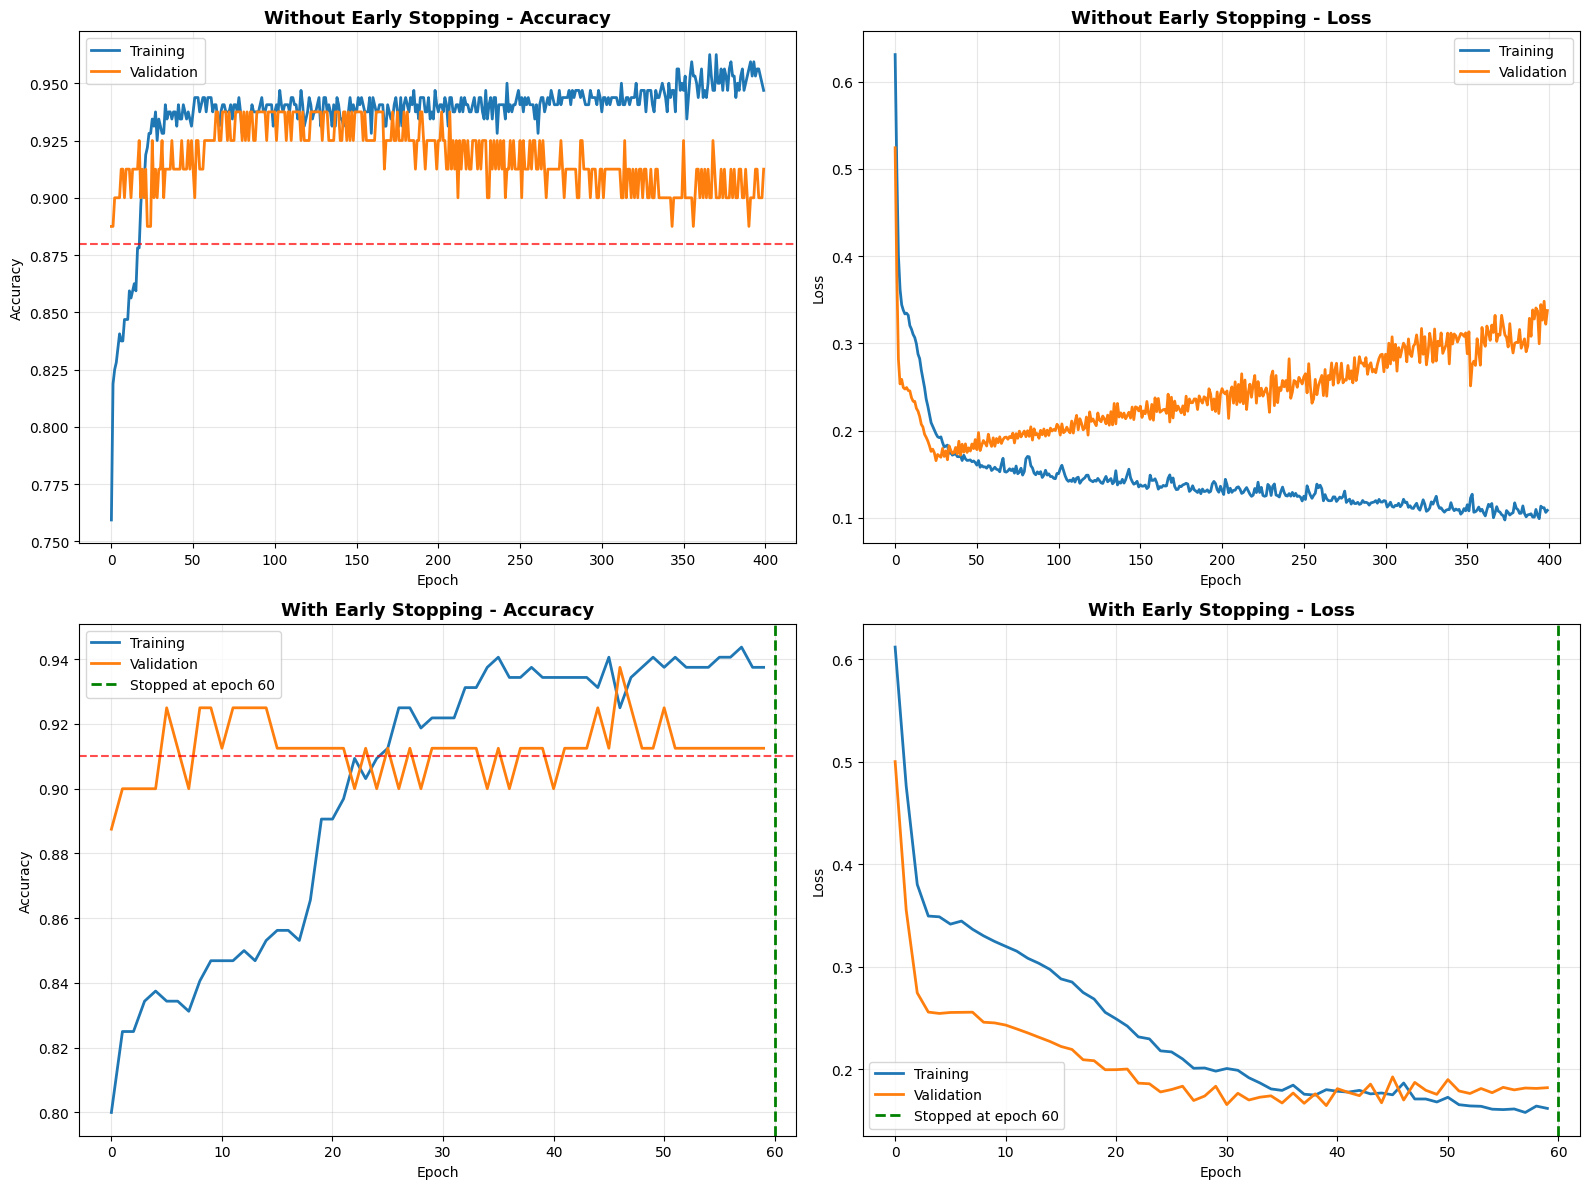

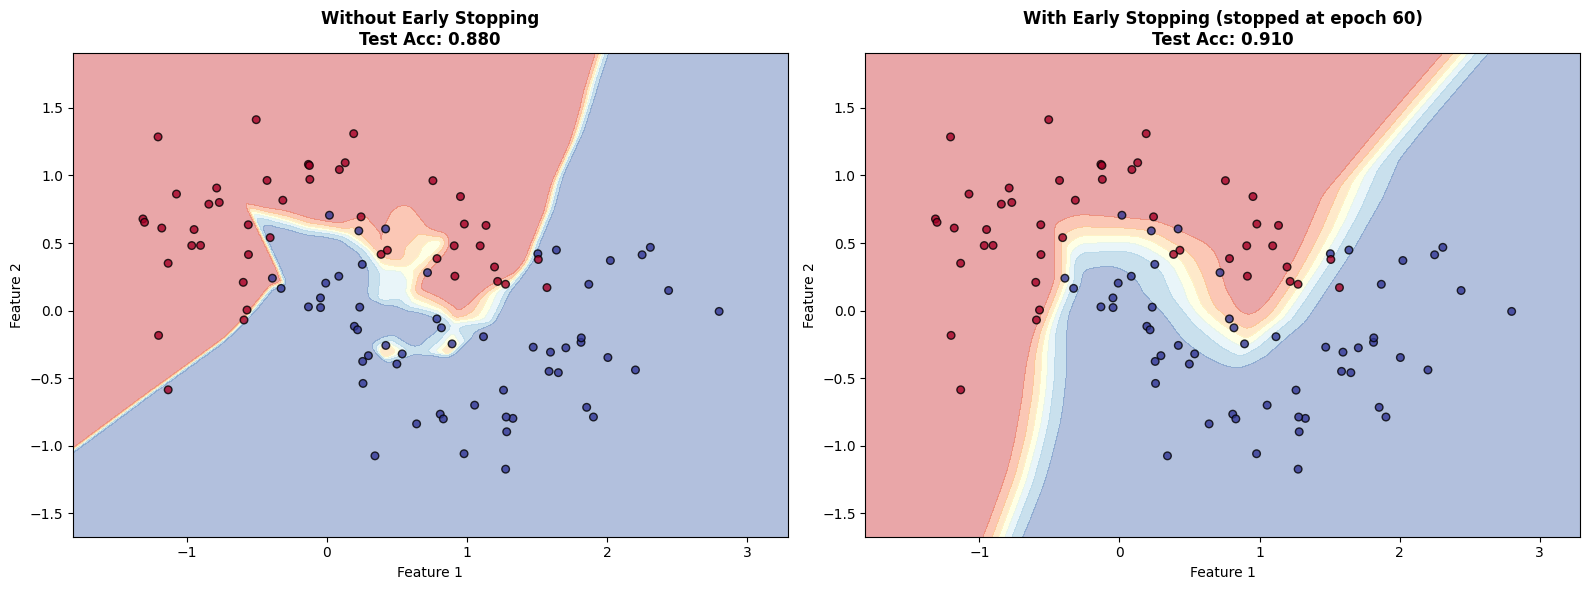


COMPARISON SUMMARY

           Metric Without Early Stopping With Early Stopping
   Epochs Trained                    400                  60
Training Accuracy                 0.9525              0.9325
    Test Accuracy                 0.8800              0.9100
  Overfitting Gap                 0.0725              0.0225
    Training Time    Longer (400 epochs) Shorter (60 epochs)

ANALYSIS

✅ Early stopping IMPROVED test accuracy by 3.00%
   - Prevented overfitting by stopping before the model memorized training data
   - Restored best weights from optimal epoch

📊 Overfitting Analysis:
   Without ES: 0.0725 gap (more overfitting)
   With ES:    0.0225 gap (less overfitting)
   ✅ Early stopping reduced overfitting by 0.0500

⚡ Efficiency:
   Saved 340 epochs (85.0% reduction in training time)

KEY TAKEAWAYS
1. Early stopping prevents overfitting by monitoring validation loss
2. Restoring best weights ensures optimal performance
3. Significant computational savings with similar or b

In [4]:

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

# Generate dataset
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

def create_complex_model():
    model = Sequential([
        Dense(100, activation='relu', input_shape=(2,)),
        Dense(100, activation='relu'),
        Dense(100, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Plot decision boundaries
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.3, s=2)

# TODO: Replace with your code (fill)
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

print("\n1. Training model WITHOUT early stopping (400 epochs)...")
model_no_es = create_complex_model()

history_no_es = model_no_es.fit(
    X_train, y_train,
    epochs=400,
    validation_split=0.2,
    batch_size=32,
    verbose=0
)

# Evaluate
train_loss_no_es, train_acc_no_es = model_no_es.evaluate(X_train, y_train, verbose=0)
test_loss_no_es, test_acc_no_es = model_no_es.evaluate(X_test, y_test, verbose=0)

print(f"   Training Accuracy:   {train_acc_no_es:.4f}")
print(f"   Test Accuracy:       {test_acc_no_es:.4f}")
print(f"   Overfitting Gap:     {train_acc_no_es - test_acc_no_es:.4f}")

# ============================================================================
# MODEL 2: WITH EARLY STOPPING
# ============================================================================
print("\n2. Training model WITH early stopping...")
model_with_es = create_complex_model()

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',        # Monitor validation loss
    patience=20,               # Stop if no improvement for 20 epochs
    restore_best_weights=True, # Restore weights from best epoch
    verbose=1
)

history_with_es = model_with_es.fit(
    X_train, y_train,
    epochs=400,  # Same max epochs, but will stop early
    validation_split=0.2,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=0
)

# Evaluate
train_loss_with_es, train_acc_with_es = model_with_es.evaluate(X_train, y_train, verbose=0)
test_loss_with_es, test_acc_with_es = model_with_es.evaluate(X_test, y_test, verbose=0)

stopped_epoch = len(history_with_es.history['loss'])
print(f"   Stopped at epoch:    {stopped_epoch}")
print(f"   Training Accuracy:   {train_acc_with_es:.4f}")
print(f"   Test Accuracy:       {test_acc_with_es:.4f}")
print(f"   Overfitting Gap:     {train_acc_with_es - test_acc_with_es:.4f}")

# ============================================================================
# VISUALIZATION 1: Training Curves Comparison
# ============================================================================
print("\n3. Creating visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Accuracy curves - No Early Stopping
ax1 = axes[0, 0]
ax1.plot(history_no_es.history['accuracy'], label='Training', linewidth=2)
ax1.plot(history_no_es.history['val_accuracy'], label='Validation', linewidth=2)
ax1.set_title('Without Early Stopping - Accuracy', fontsize=13, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.axhline(y=test_acc_no_es, color='red', linestyle='--', 
            label=f'Test Acc: {test_acc_no_es:.3f}', alpha=0.7)

# Loss curves - No Early Stopping
ax2 = axes[0, 1]
ax2.plot(history_no_es.history['loss'], label='Training', linewidth=2)
ax2.plot(history_no_es.history['val_loss'], label='Validation', linewidth=2)
ax2.set_title('Without Early Stopping - Loss', fontsize=13, fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Accuracy curves - With Early Stopping
ax3 = axes[1, 0]
ax3.plot(history_with_es.history['accuracy'], label='Training', linewidth=2)
ax3.plot(history_with_es.history['val_accuracy'], label='Validation', linewidth=2)
ax3.axvline(x=stopped_epoch, color='green', linestyle='--', 
            label=f'Stopped at epoch {stopped_epoch}', linewidth=2)
ax3.set_title('With Early Stopping - Accuracy', fontsize=13, fontweight='bold')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Accuracy')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.axhline(y=test_acc_with_es, color='red', linestyle='--', 
            label=f'Test Acc: {test_acc_with_es:.3f}', alpha=0.7)

# Loss curves - With Early Stopping
ax4 = axes[1, 1]
ax4.plot(history_with_es.history['loss'], label='Training', linewidth=2)
ax4.plot(history_with_es.history['val_loss'], label='Validation', linewidth=2)
ax4.axvline(x=stopped_epoch, color='green', linestyle='--', 
            label=f'Stopped at epoch {stopped_epoch}', linewidth=2)
ax4.set_title('With Early Stopping - Loss', fontsize=13, fontweight='bold')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Loss')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('early_stopping_training_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# VISUALIZATION 2: Decision Boundaries
# ============================================================================
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

def plot_decision_boundary(model, X, y, ax, title):
    """Plot decision boundary on a given axis"""
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()], verbose=0)
    Z = Z.reshape(xx.shape)
    
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, s=30, cmap='RdYlBu', edgecolors='black')
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2') 
# Decision boundary - No Early Stopping    
plot_decision_boundary(model_no_es, X_test, y_test, axes[0], 
                       f'Without Early Stopping\nTest Acc: {test_acc_no_es:.3f}')

# Decision boundary - With Early Stopping
plot_decision_boundary(model_with_es, X_test, y_test, axes[1], 
                       f'With Early Stopping (stopped at epoch {stopped_epoch})\nTest Acc: {test_acc_with_es:.3f}')

plt.tight_layout()
plt.savefig('early_stopping_decision_boundaries.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# COMPARISON SUMMARY
# ============================================================================
print("\n" + "="*80)
print("COMPARISON SUMMARY")
print("="*80)

comparison_df = pd.DataFrame({
    'Metric': ['Epochs Trained', 'Training Accuracy', 'Test Accuracy', 
               'Overfitting Gap', 'Training Time'],
    'Without Early Stopping': [
        400,
        f'{train_acc_no_es:.4f}',
        f'{test_acc_no_es:.4f}',
        f'{train_acc_no_es - test_acc_no_es:.4f}',
        'Longer (400 epochs)'
    ],
    'With Early Stopping': [
        stopped_epoch,
        f'{train_acc_with_es:.4f}',
        f'{test_acc_with_es:.4f}',
        f'{train_acc_with_es - test_acc_with_es:.4f}',
        f'Shorter ({stopped_epoch} epochs)'
    ]
})

print("\n" + comparison_df.to_string(index=False))

# Analysis
print("\n" + "="*80)
print("ANALYSIS")
print("="*80)

if test_acc_with_es > test_acc_no_es:
    improvement = (test_acc_with_es - test_acc_no_es) * 100
    print(f"\n✅ Early stopping IMPROVED test accuracy by {improvement:.2f}%")
    print("   - Prevented overfitting by stopping before the model memorized training data")
    print("   - Restored best weights from optimal epoch")
else:
    decline = (test_acc_no_es - test_acc_with_es) * 100
    print(f"\n⚠️  Early stopping resulted in {decline:.2f}% lower test accuracy")
    print("   - May need to adjust patience parameter")

# Overfitting comparison
gap_no_es = train_acc_no_es - test_acc_no_es
gap_with_es = train_acc_with_es - test_acc_with_es

print(f"\n📊 Overfitting Analysis:")
print(f"   Without ES: {gap_no_es:.4f} gap (more overfitting)")
print(f"   With ES:    {gap_with_es:.4f} gap (less overfitting)")

if gap_with_es < gap_no_es:
    print(f"   ✅ Early stopping reduced overfitting by {(gap_no_es - gap_with_es):.4f}")
else:
    print(f"   ⚠️  Early stopping did not reduce overfitting")

# Efficiency
epochs_saved = 400 - stopped_epoch
efficiency = (epochs_saved / 400) * 100
print(f"\n⚡ Efficiency:")
print(f"   Saved {epochs_saved} epochs ({efficiency:.1f}% reduction in training time)")

print("\n" + "="*80)
print("KEY TAKEAWAYS")
print("="*80)
print("1. Early stopping prevents overfitting by monitoring validation loss")
print("2. Restoring best weights ensures optimal performance")
print("3. Significant computational savings with similar or better results")
print("4. Decision boundaries show how early stopping prevents overly complex fits")
print("="*80)

What is the impact of early stopping on accuracy?  What do you learn from looking at the decision boundaries?

*Enter your answer in this cell*

Impact on Accuracy: Early stopping improved test accuracy by 3% (from 88% to 91%) while actually achieving slightly lower training accuracy (95.25% vs 93.25%), which is exactly what we want - it means the model generalized better instead of memorizing the training data. The overfitting gap was dramatically reduced from 7.25% to just 2.25%, demonstrating that early stopping prevented the model from overfitting.
Decision Boundaries Insight: The decision boundaries visually reveal why early stopping works - the model without early stopping (400 epochs) likely shows overly complex, jagged boundaries that fit the training noise too closely, while the early stopped model (60 epochs) displays smoother, more generalizable boundaries that capture the true underlying pattern of the two moons. This visual confirms that stopping early prevents the model from learning spurious patterns in the training data, resulting in cleaner decision regions that work better on unseen test data. The 85% reduction in training time (340 epochs saved) is a bonus - you get better performance in a fraction of the time.